In [34]:
# import neccessary library
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Open the .names file and read lines
with open('data/raw/wdbc.names', 'r') as file:
    for line in file:
        print(line.strip())


1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators:

Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

W.N. Street, W.H. Wolberg and O.L. Mangasarian
Nuclear feature extraction for breast tumor diagnosis.
IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

O.L. Mangasarian, W.N. Street and W.H. Wolberg.
Breast cancer diagnosis and prognosis via linear programming.
Operations Research, 43(4), pages 570-577, July-Augu

In [16]:
#import dataset
data =pd.read_csv('data/raw/breast.csv')


In [17]:
#preview of the dataset
data

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
#change the Diagnosis to binary[0,1] values 
data['Diagnosis'] = data['Diagnosis'].replace({'M': 1, 'B': 0})
data


,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


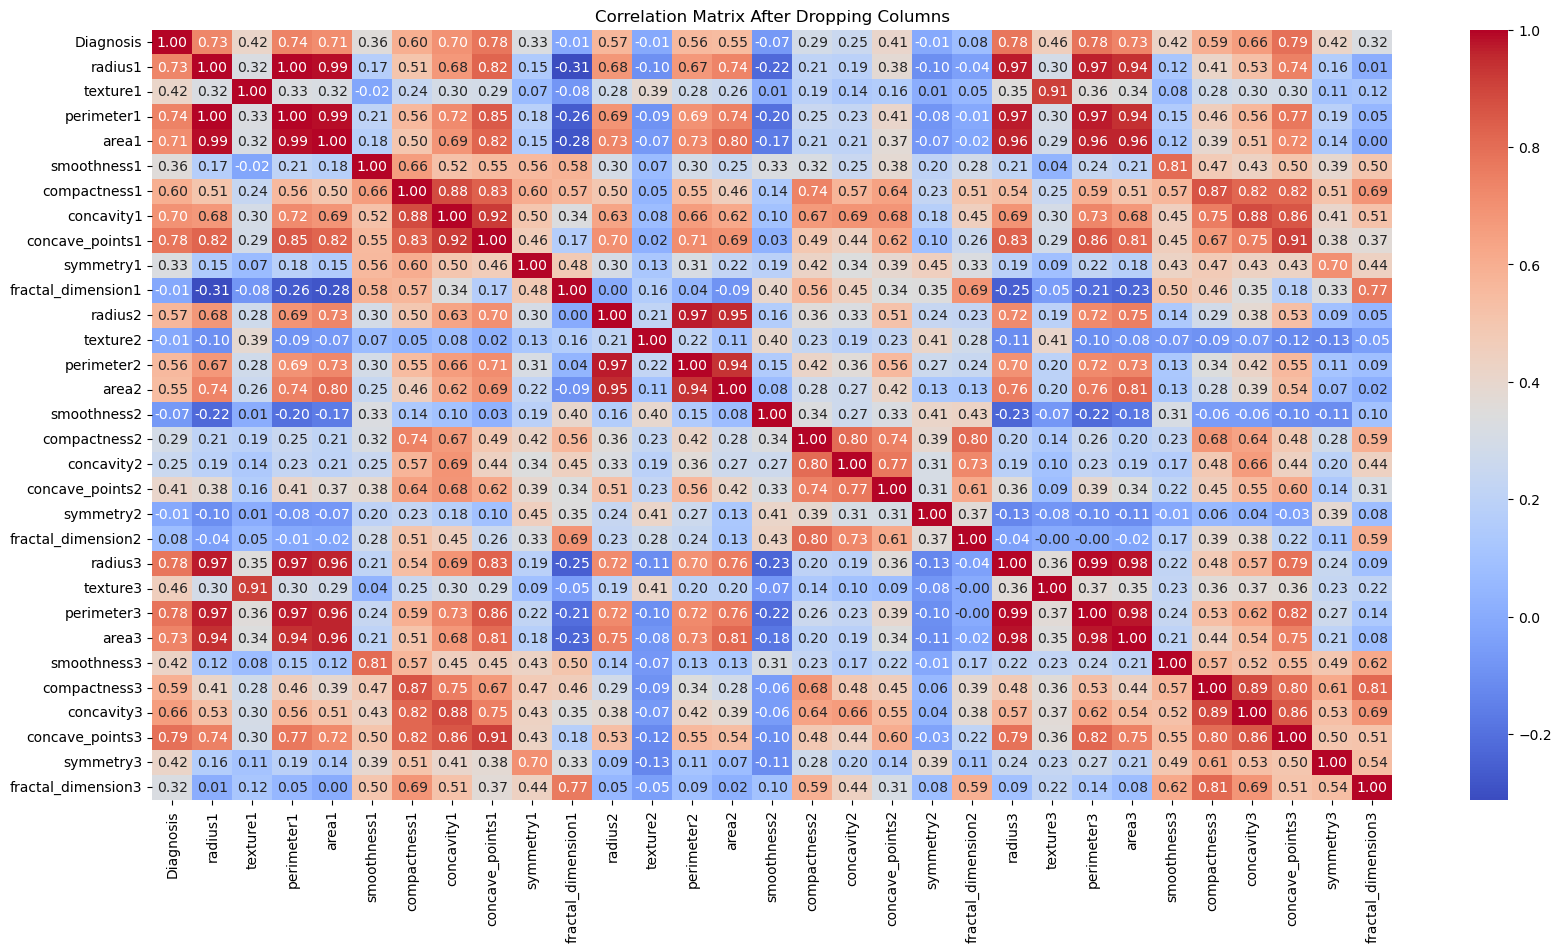

In [28]:
#drop ['ID']
#compute corr metrix
#plot the heatmap
df_without_id = data.drop(['ID'], axis=1)

corr_matrix = df_without_id.corr()
corr_matrix

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix After Dropping Columns')
plt.show()


In [42]:
# distribution of features between B(0),M(1)


alt.Chart(df_without_id.sort_values(by='Diagnosis')).mark_bar(opacity=0.6).encode(
    alt.X(alt.repeat(), bin=alt.Bin(maxbins=50)),
    alt.Y('count()', stack=None),
    alt.Color('Diagnosis:N')
).properties(
    height=200
).repeat(
    ["radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity1","concave_points1","symmetry1","fractal_dimension1"
    ,"radius2","texture2","perimeter2","area2","smoothness2","compactness2","concavity2","concave_points2","symmetry2","fractal_dimension2",
    "radius3","texture3","perimeter3","area3","smoothness3","compactness3","concavity3","concave_points3","symmetry3","fractal_dimension3"
    ],
    columns=2
)

alt.RepeatChart(...)